Import the neccesary libraries

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Data Loading

In [84]:
print("Loading Blackstock data............")
df = pd.read_csv("blk.csv")
print("Data loaded successfully")

Loading Blackstock data............
Data loaded successfully


Data Preprocessing and Feature Engineering

In [85]:
# Data Preprocessing involves cleaning and preparing the data for the model
# Well define our features (X) and our target (y)
# The "Date" column is not a numerical feature, so we will not include it in our model

# Rename the column for clarity and consistency
df.rename(columns={
    "Date":"date",
    "Open":"open",
    "High":"high",
    "Low":"low",
    "Close":"close",
    "Adj Close":"adj_close",
    "Volume":"volume"
},inplace=True)

# Check for missing values
df_missing = df.isnull().sum()
print("Missing values")
print(df_missing)

# Check for duplicated values
df_duplicated = df.duplicated().sum()
print("Duplicated values")
print(df_duplicated)

# Define the features and target 
features = ["open","high","low","volume"]
target = "close"

X = df[features]
y = df[target]

print("Shape of features (X)",X.shape)
print("Shape of target (y)",y.shape)

Missing values
date        0
open        0
high        0
low         0
close       0
AdjClose    0
volume      0
dtype: int64
Duplicated values
0
Shape of features (X) (2499, 4)
Shape of target (y) (2499,)


Data Splitting

In [86]:
# We split the data into a training set and a testing set
# The model learns from the training data and is then evaluated on the testing data
# whcih it has never seen before. This gives a realistic measure of its performance
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Number of samples in training set:",len(X_train))
print("Number of samples in testing set:",len(X_test))

Number of samples in training set: 1999
Number of samples in testing set: 500


Model Training

In [87]:
# We initialize our Linear Regression model and train it using the trainng data
# The "fit" method is where the magic happens, as the model learns the coefficients for its linear equation

print("Training the Linear Regression model")
model = LinearRegression()
model.fit(X_train,y_train)
print("Model training complete")


Training the Linear Regression model
Model training complete


Model Evaluation

In [88]:
# We use the trained model to make predictions on the test set
# We then evaluate these predictions using key metrics
# Mean Squared Error (MSE) is the average of the squared errors
# R-squared measures the proportion of variance in the dependent variable that is predictable from the independent variables

print("Evaluating the model")
y_pred  = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Evaluating the model
Mean Squared Error (MSE): 3.20
R-squared: 1.00


Visualization

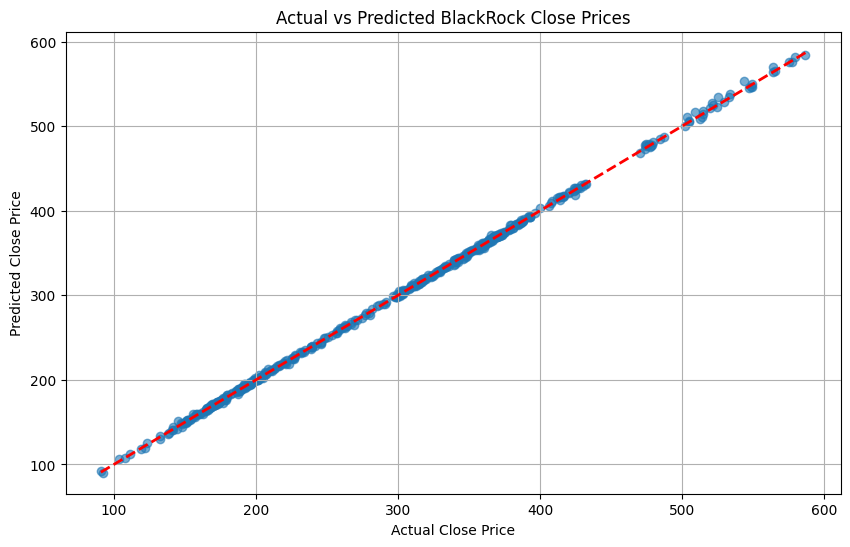

In [89]:
# A scatter plot is an excellent way to visualize the model's performance
# We plot the actual prices against the predicted prices. If the model is perfect
# all points will fall on the dashed red line

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted BlackRock Close Prices")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.grid(True)
plt.show()

Making a new prediction

In [90]:
# Finally, we can use our trained model to make a prediction on new, unseen data
# This simulates how the model would be used in a real application
# Note: These values are hypothetical
new_data = pd.DataFrame({
    'open': [450.0],
    'high': [455.0],
    'low': [448.0],
    'volume': [1500000]
})

predicted_price = model.predict(new_data)
print(f"Example prediction for a new data point")
print(f"Features: open=450, high=455, low=448, volume=1.5M")
print(f"Predicted Close Price: ${predicted_price[0]:.2f}")

Example prediction for a new data point
Features: open=450, high=455, low=448, volume=1.5M
Predicted Close Price: $452.61
